In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from bycycle.filt import lowpass_filter
from bycycle.features import compute_features
%matplotlib inline

# Load brain rhythm signal
And apply a lowpass filter

In [18]:
# Load the signal
x = np.load('data/sim_bursting.npy')
Fs = 1000  # Sampling rate
t = np.arange(0, len(x) / Fs, 1 / Fs)
f_alpha = (8, 12)

# Apply a lowpass filter to remove high frequency power that interferes with extrema localization
x = lowpass_filter(x, Fs, 30, N_seconds=.2, remove_edge_artifacts=False)

# Compute cycle dataframe

In [19]:
burst_kwargs = {'amplitude_fraction_threshold': .3,
                'amplitude_consistency_threshold': .4,
                'period_consistency_threshold': .5,
                'monotonicity_threshold': .8,
                'N_cycles_min': 3}

df = compute_features(x, Fs, f_alpha, burst_detection_kwargs=burst_kwargs)

/Users/scott/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/scott/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Visualize burst detection

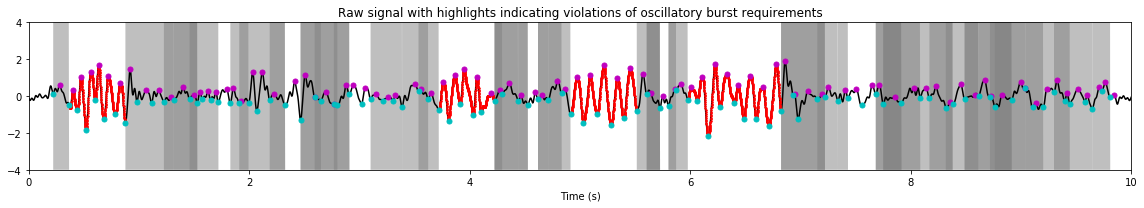

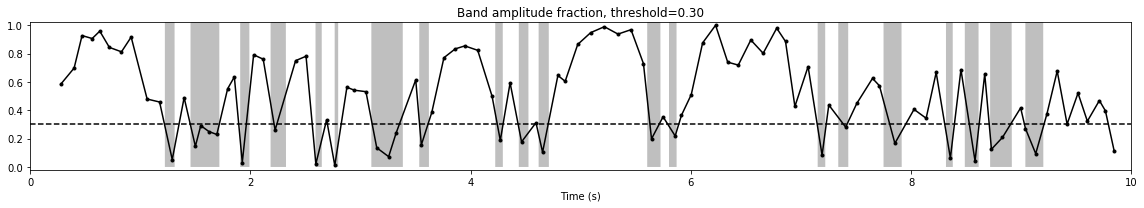

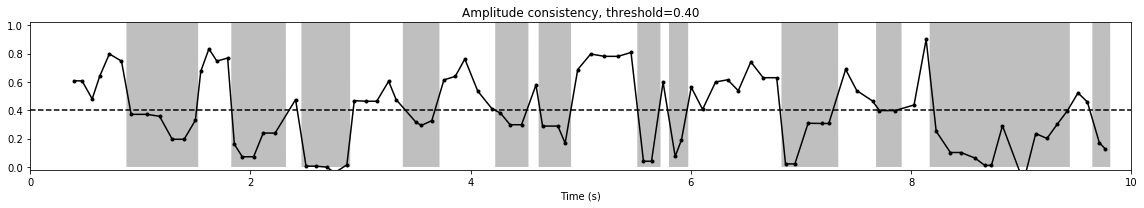

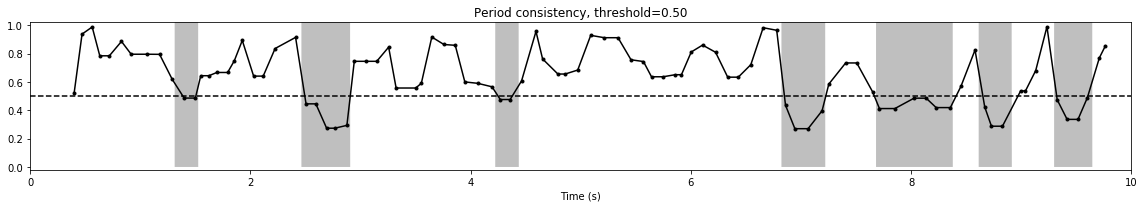

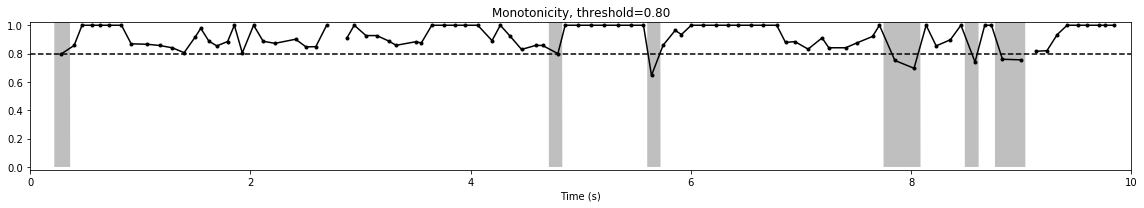

In [32]:
# Determine extrema strs
if 'sample_trough' in df.columns:
    center_e = 'trough'
    side_e = 'peak'
else:
    center_e = 'peak'
    side_e = 'trough'

# Determine which samples are defined as bursting
is_osc = np.zeros(len(x), dtype=bool)
df_osc = df[df['is_burst']]
for _, cyc in df_osc.iterrows():
    is_osc[cyc['sample_last_' + side_e]:cyc['sample_next_' + side_e] + 1] = True

# Plot the time series and indicate peaks and troughs
figsize=(16,3)
tlims = (t[0], t[-1])

plt.figure(figsize=figsize)
plt.plot(t, x, 'k')
plt.plot(t[is_osc], x[is_osc], 'r.', ms=3)
plt.plot(t[df['sample_' + center_e]], x[df['sample_' + center_e]], 'm.', ms=10)
plt.plot(t[df['sample_last_' + side_e]], x[df['sample_last_' + side_e]], 'c.', ms=10)
plt.xlim(tlims)
plt.tight_layout()
plt.title('Raw signal with highlights indicating violations of oscillatory burst requirements')
plt.ylim((-4, 4))
plt.xlabel('Time (s)')

# Highlight where burst detection parameters were violated
# Use a different color for each burst detection parameter
plt.fill_between(t[df['sample_last_' + side_e]], -4, 400,
                 where=df['amp_fraction'] < burst_kwargs['amplitude_fraction_threshold'],
                 interpolate=True, facecolor='gray', alpha=0.5, )
plt.fill_between(t[df['sample_last_' + side_e]], -4, 400,
                 where=df['amp_consistency'] < burst_kwargs['amplitude_consistency_threshold'],
                 interpolate=True, facecolor='gray', alpha=0.5)
plt.fill_between(t[df['sample_last_' + side_e]], -4, 400,
                 where=df['period_consistency'] < burst_kwargs['period_consistency_threshold'],
                 interpolate=True, facecolor='gray', alpha=0.5)
plt.fill_between(t[df['sample_last_' + side_e]], -4, 400,
                 where=df['monotonicity'] < burst_kwargs['monotonicity_threshold'],
                 interpolate=True, facecolor='gray', alpha=0.5)
plt.tight_layout()
plt.savefig('figs/3A_burst_detection.png')

plt.figure(figsize=figsize)
plt.plot(t[df['sample_' + center_e]], df['amp_fraction'], 'k.-')
plt.plot(tlims, [burst_kwargs['amplitude_fraction_threshold'],
                 burst_kwargs['amplitude_fraction_threshold']], 'k--')
plt.xlim(tlims)
plt.ylim((-.02, 1.02))
plt.title('Band amplitude fraction, threshold={:.02f}'.format(burst_kwargs['amplitude_fraction_threshold']))
plt.fill_between(t[df['sample_last_' + side_e]], 0, 100,
                 where=df['amp_fraction'] < burst_kwargs['amplitude_fraction_threshold'],
                 interpolate=True, facecolor='gray', alpha=0.5)
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('figs/3B_amp_fraction.png')

plt.figure(figsize=figsize)
plt.plot(t[df['sample_' + center_e]], df['amp_consistency'], 'k.-')
plt.plot(tlims, [burst_kwargs['amplitude_consistency_threshold'],
                 burst_kwargs['amplitude_consistency_threshold']], 'k--')
plt.xlim(tlims)
plt.ylim((-.02, 1.02))
plt.title('Amplitude consistency, threshold={:.02f}'.format(burst_kwargs['amplitude_consistency_threshold']))
plt.fill_between(t[df['sample_last_' + side_e]], 0, 100,
                 where=df['amp_consistency'] < burst_kwargs['amplitude_consistency_threshold'],
                 interpolate=True, facecolor='gray', alpha=0.5)
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('figs/3C_amp_consistency.png')

plt.figure(figsize=figsize)
plt.plot(t[df['sample_' + center_e]], df['period_consistency'], 'k.-')
plt.plot(tlims, [burst_kwargs['period_consistency_threshold'],
                 burst_kwargs['period_consistency_threshold']], 'k--')
plt.xlim(tlims)
plt.title('Period consistency, threshold={:.02f}'.format(burst_kwargs['period_consistency_threshold']))
plt.fill_between(t[df['sample_last_' + side_e]], 0, 100,
                 where=df['period_consistency'] < burst_kwargs['period_consistency_threshold'],
                 interpolate=True, facecolor='gray', alpha=0.5)
plt.ylim((-.02, 1.02))
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('figs/3D_period_consistency.png')

plt.figure(figsize=figsize)
plt.plot(t[df['sample_' + center_e]], df['monotonicity'], 'k.-')
plt.plot(tlims, [burst_kwargs['monotonicity_threshold'],
                 burst_kwargs['monotonicity_threshold']], 'k--')
plt.xlim(tlims)
plt.title('Monotonicity, threshold={:.02f}'.format(burst_kwargs['monotonicity_threshold']))
plt.fill_between(t[df['sample_last_' + side_e]], 0, 100,
                 where=df['monotonicity'] < burst_kwargs['monotonicity_threshold'],
                 interpolate=True, facecolor='gray', alpha=0.5)
plt.ylim((-.02, 1.02))
plt.xlabel('Time (s)')
plt.tight_layout()
plt.savefig('figs/3E_monotonicity.png')